<a href="https://colab.research.google.com/github/sjunc/2025-1-myclass-BDA/blob/main/inclass/10W_B_Wed_0507_easy_ch09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09 데이터 분석 프로젝트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 30 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 2.16 MiB | 3.38 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [3]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
2.2.2
2.0.2
0.13.2
0.5.2


In [4]:
# 선명하게
%config InlineBackend.figure_format = 'retina'

In [5]:
# 코랩 matplotlib 한글화
!pip install koreanize_matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 65.6 MB/s eta 0:00:00


In [6]:
path_to_sav = \
  "/data/Koweps_hpwc14_2019_beta2.sav"

In [7]:
# 그림 설정 크기, 화질
plt.rcParams.update({'figure.figsize': (7, 5), 'figure.dpi': '100'})
'''
로컬에서의 한글 설정

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

'''

"\n로컬에서의 한글 설정\n\nplt.rcParams['axes.unicode_minus'] = False\nplt.rc('font', family='Malgun Gothic')\n\nplt.rcParams['font.family'] = 'Malgun Gothic'\nplt.rcParams['axes.unicode_minus'] = False\n\n"

In [8]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

In [9]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.1 MB/s eta 0:00:00


In [10]:
raw_welfare = pd.read_spss('drive/MyDrive/data/Koweps_hpwc14_2019_beta2.sav')
raw_welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,2.01e+04,0.0,NaN,0.29,0.29,1307.76,1307.76,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,3.01e+04,0.0,NaN,0.42,0.42,1882.57,1882.57,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,4.01e+04,0.0,NaN,0.27,0.27,1189.69,1192.91,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.49,0.50,2219.63,2224.27,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,6.01e+04,0.0,NaN,1.02,1.02,4565.39,4565.39,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [11]:
raw_welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [32]:
welfare = raw_welfare.copy()

In [33]:
welfare.shape

(14418, 830)

In [34]:
welfare = welfare.rename(columns= {'h14_g3':'sex',
                                   'h14_g4':'birth',
                                   'h14_g10':'marriage_type',
                                   'h14_g11':'religion',
                                   'p1402_8aq1':'income',
                                   'h14_eco9':'code_job',
                                   'h14_reg7':'code_region'})

In [35]:
welfare['sex']    # 1남자 2여자

,sex
0,2.0
1,1.0
2,1.0
3,1.0
4,2.0
...,...
14413,2.0
14414,2.0
14415,1.0
14416,2.0


In [36]:
welfare['sex'].dtypes

dtype('float64')

In [37]:
welfare.sex.value_counts()

,count
sex,
2.0,7913
1.0,6505


In [38]:
welfare.sex.isna().sum()    # 결측값 존재 X

np.int64(0)

In [39]:
welfare['sex'] = np.where(welfare['sex'] == 1.0, 'male', 'female')
welfare['sex'].value_counts()

,count
sex,
female,7913
male,6505


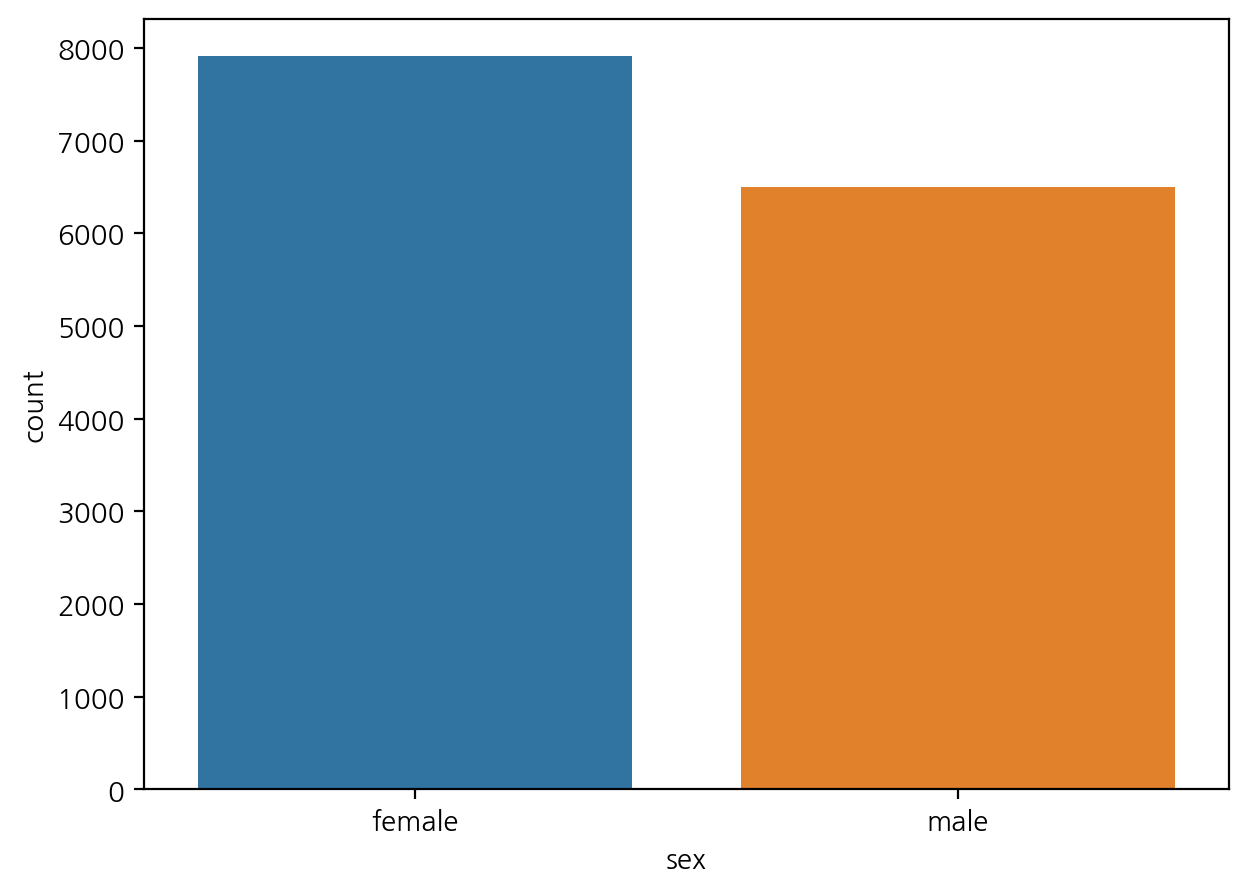

In [40]:
sns.countplot(welfare, x='sex', hue = 'sex');